In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### <span style="color:purple;">Load Dataset  </span>


In [79]:
df = pd.read_csv("./netflix_titles.csv"

### <span style="color:purple;">Data Exploration  </span>

In [80]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [81]:
# need to drop show_id column
df = df.drop("show_id", axis=1)

In [82]:
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [83]:
df.shape

(8807, 11)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [85]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [86]:
df.count()

type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [87]:
df.describe() # Almost every columns are string variable

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [88]:
df.describe([0, 0.05, 0.50, 0.95,1]).T

,count,mean,std,min,0%,5%,50%,95%,100%,max
release_year,8807.0,2014.180198,8.819312,1925.0,1925.0,1997.0,2017.0,2021.0,2021.0,2021.0


In [89]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [90]:
# Is there any null values?
df.isnull().values.any()

True

In [91]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [92]:
df.nunique()

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [93]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [94]:
df.groupby("country")["type"].count()

country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: type, Length: 748, dtype: int64

## Univariate Analysis
Exploring individual variables to understand their distribution and characteristics.

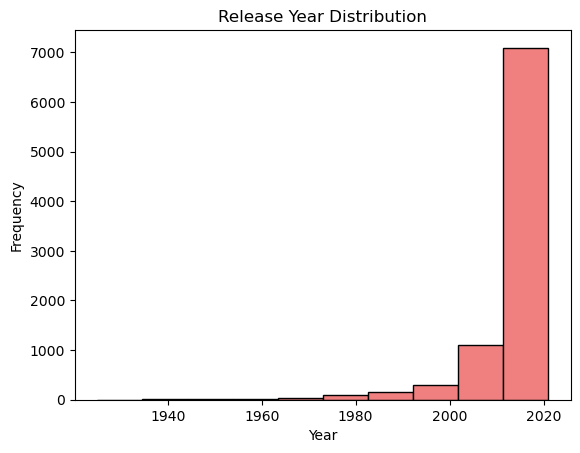

In [95]:
plt.hist(df["release_year"], color = "lightcoral", edgecolor = "black")
plt.title("Release Year Distribution")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

In [96]:
def release_year(Movie_or_Show):
    release_year = df[df["type"] == Movie_or_Show][["release_year"]]
    release_year["release_year"].value_counts()[:15].plot(kind="bar",
                                                         color="lightcoral",
                                                          figsize=(20,10))
    plt.title(f"Frequency of {Movie_or_Show}")
    plt.show()

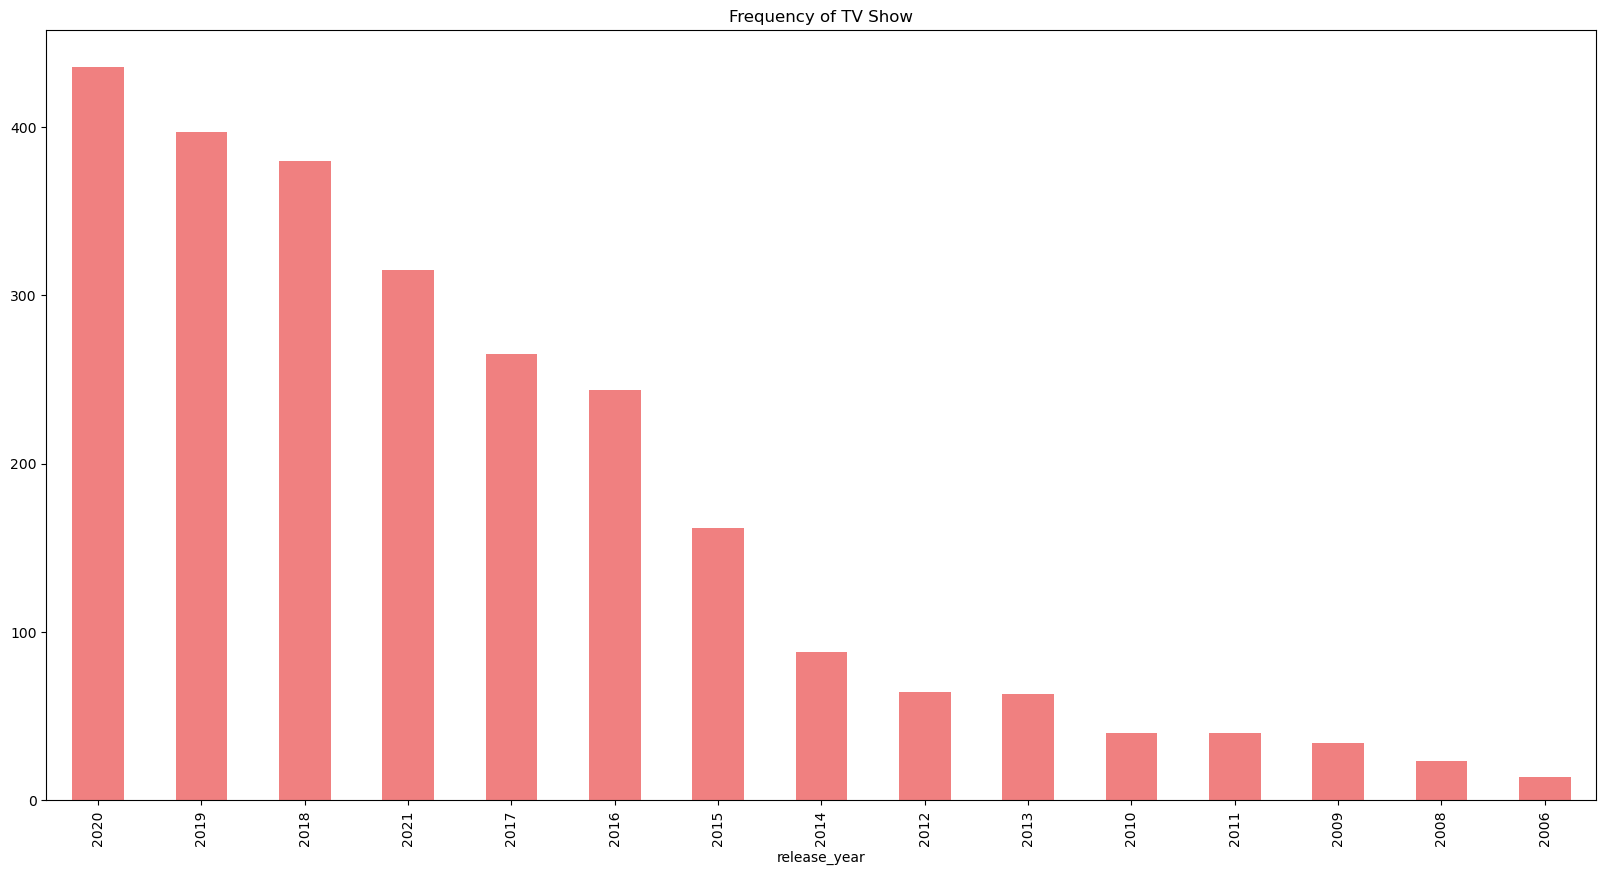

In [97]:
# TV Show Released Year
release_year("TV Show")

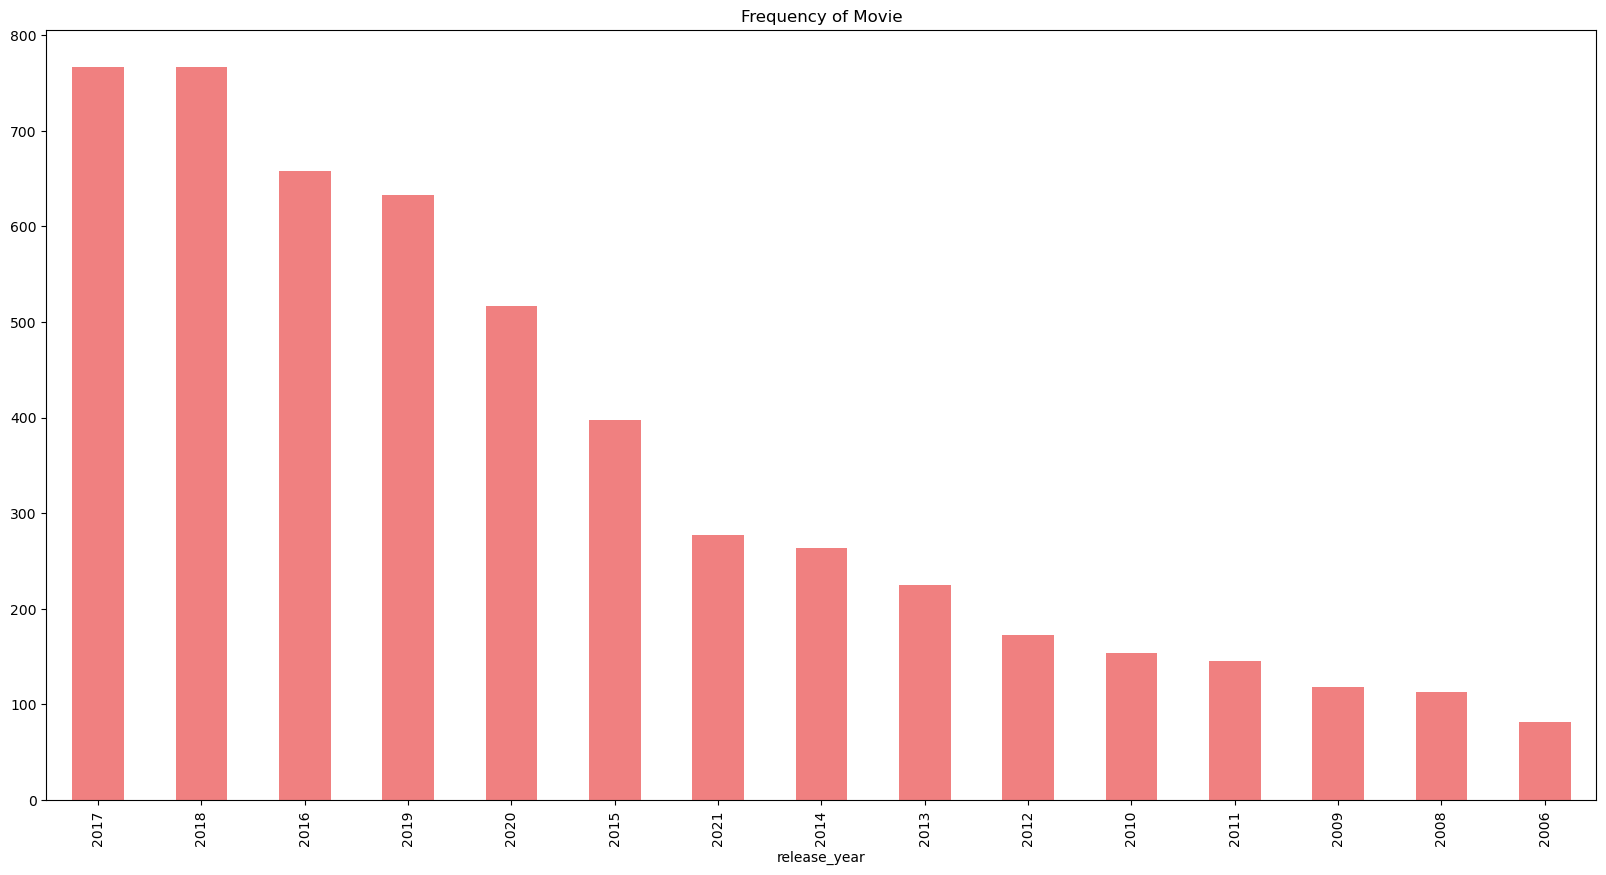

In [98]:
# Movie Released Year
release_year("Movie")

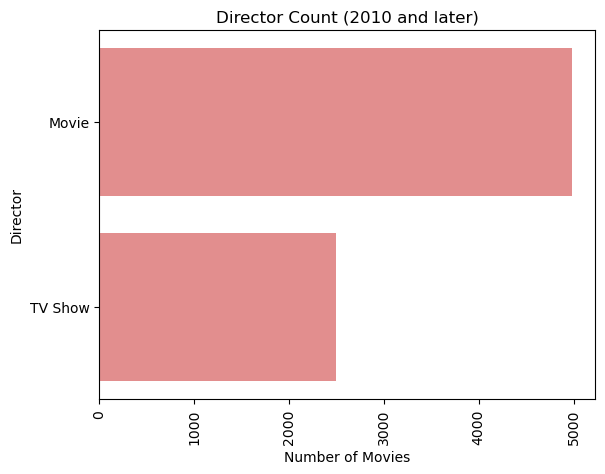

In [99]:
sns.countplot(data=df[df["release_year"] >= 2010], y="type", color="lightcoral")
plt.title("Director Count (2010 and later)")
plt.xticks(rotation=90)
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

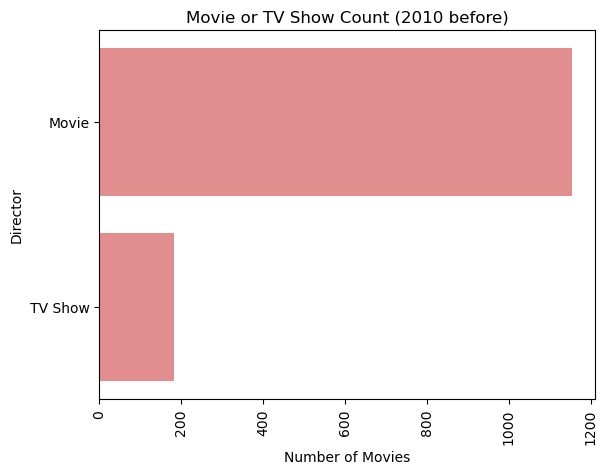

In [100]:
sns.countplot(data=df[df["release_year"] < 2010], y="type", color="lightcoral")
plt.title("Movie or TV Show Count (2010 before)")
plt.xticks(rotation=90)
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

Top 15 Content Amount

<Axes: xlabel='count', ylabel='country'>

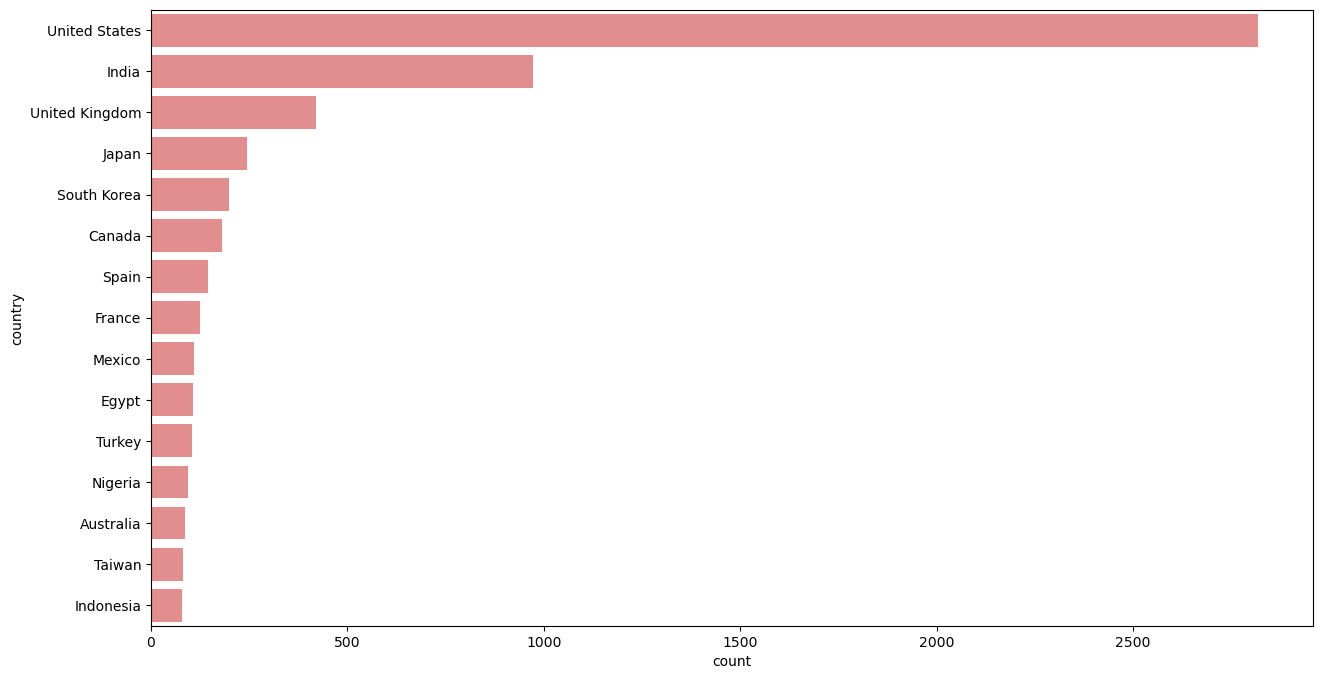

In [101]:
countries = df["country"].value_counts()[:15]
plt.subplots(figsize=(15,8))
sns.barplot(x=countries, y=countries.index,color = "lightcoral",data=df)

## PIE CHART

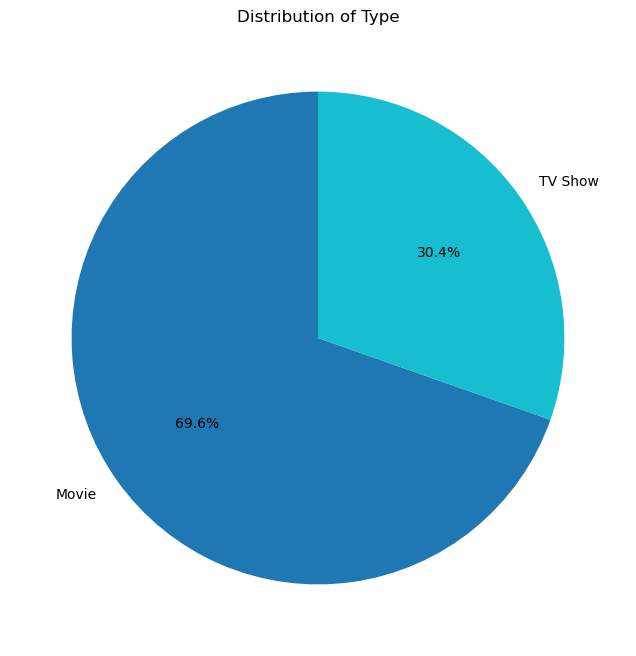

In [102]:
# TYPE PIE CHART
plt.figure(figsize=(8, 8))
df["type"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10')
plt.title("Distribution of Type")
plt.ylabel("")  # hide Yaxis 
plt.show()

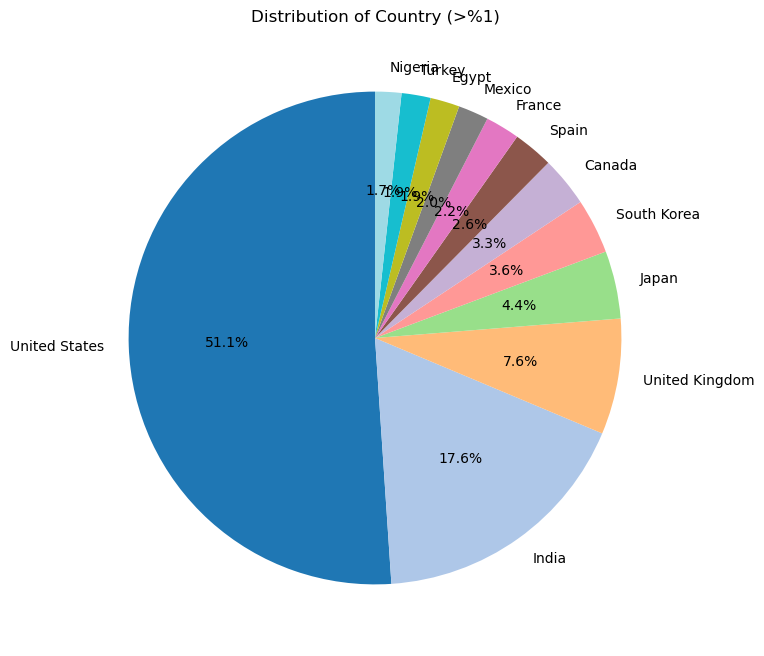

In [103]:
# COUNTRY PIE CHART (took more than %1 percentage)
country_counts = df["country"].value_counts()
threshold = len(df) * 0.01  # %1 
filtered_countries = country_counts[country_counts > threshold]

plt.figure(figsize=(8, 8))
filtered_countries.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title("Distribution of Country (>%1)")
plt.ylabel("")  # hide Yaxis 
plt.show()

In [104]:
def release_year_pie(Movie_or_Show, year):
    filtered_df = df[(df["release_year"] > year) & (df["type"] == Movie_or_Show)]
    year_counts = filtered_df["release_year"].value_counts().sort_index()
    plt.figure(figsize=(8, 8))
    year_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
    plt.title(f"{Movie_or_Show} Released After {year}")
    plt.ylabel("")  # hide Yaxis
    plt.show()

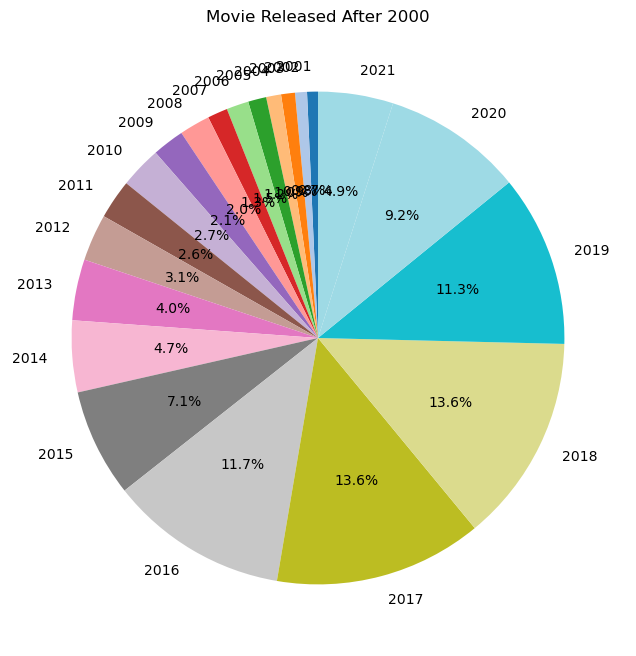

In [105]:
release_year_pie("Movie", 2000)

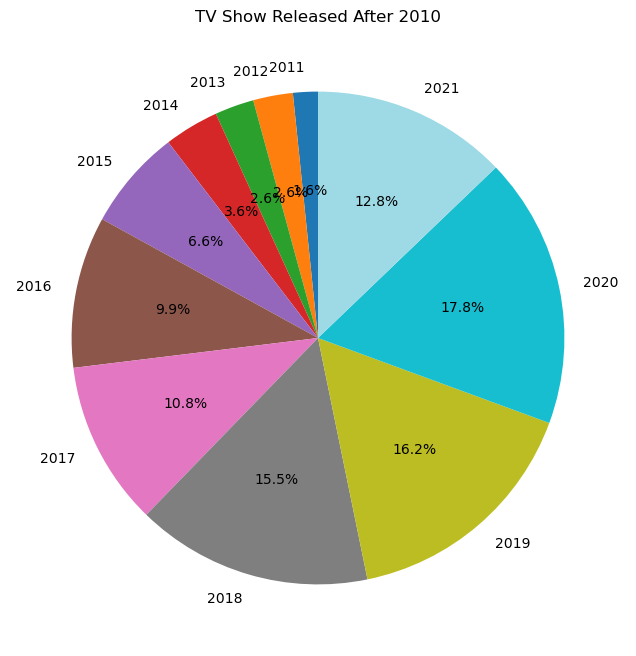

In [106]:
release_year_pie("TV Show", 2010)

In [107]:
# Bar Chart – Count of Films by Year
def plot_bar_chart(Movie_or_Show, year):
    filtered_df = df[(df["release_year"] > year) & (df["type"] == Movie_or_Show)]
    year_counts = filtered_df["release_year"].value_counts().reset_index()
    year_counts.columns = ["release_year", "count"]
    fig = px.bar(year_counts, x="release_year", y="count", 
                 title="Movies Released After 2000",
                 labels={"release_year": "Year", "count": "Number of Movies"},
                 color="count", color_continuous_scale="Blues")
    fig.show()

In [108]:
plot_bar_chart("Movie", 2010)

In [109]:
# Counts of Film or TV Programme Distributions by Year  
def plot_histogram(Movie_or_Show, year):
    filtered_df = df[(df["release_year"] > year) & (df["type"] == Movie_or_Show)]
    fig = px.histogram(filtered_df, x="release_year", 
                       title="Histogram of Movies Released Over Years",
                       labels={"release_year": "Year"},
                       nbins=20, color_discrete_sequence=["orange"])
    fig.show()

In [110]:
plot_histogram("Movie", 2010)

In [111]:
# Run this in a code cell
!pip install wordcloud

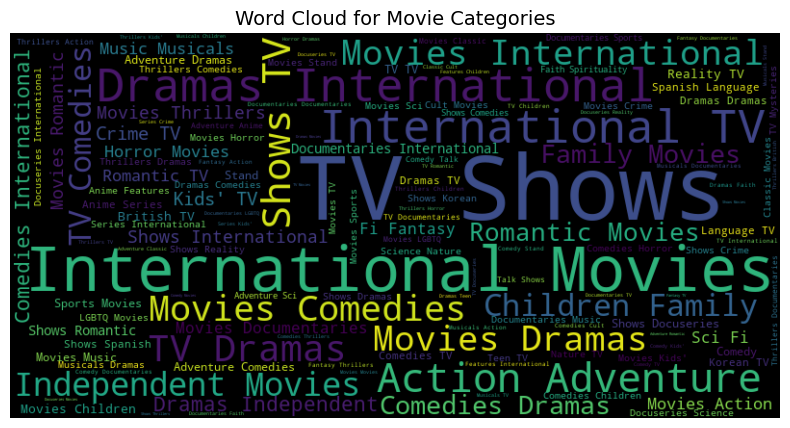

In [112]:
from wordcloud import WordCloud

text = " ".join(df["listed_in"].dropna())

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="viridis").generate(text)

# Visualize
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("Word Cloud for Movie Categories", fontsize=14)
plt.show()

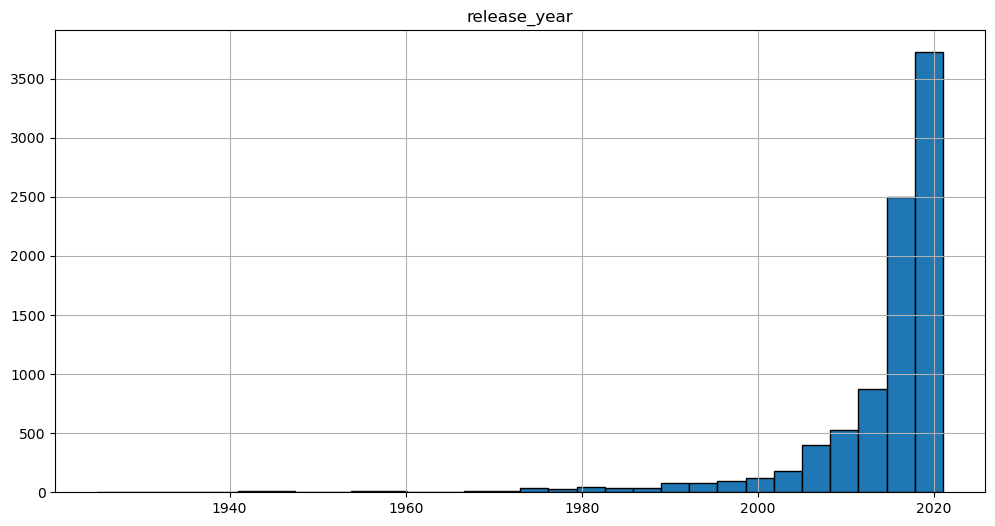

In [113]:
# Histogram for numerical columns
df.hist(figsize=(12, 6), bins=30, edgecolor='black')
plt.show()

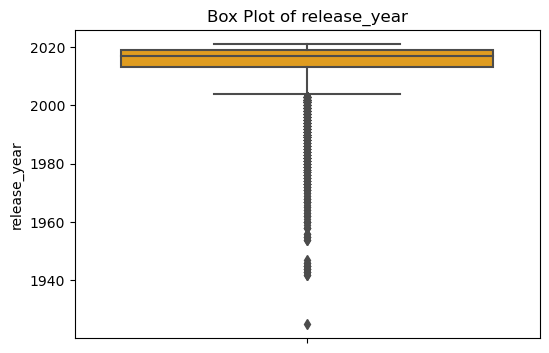

In [114]:
# Box plot for outlier detection
numerical_columns = ['release_year']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.show()

## Multivariate Analysis
Analyzing multiple variables simultaneously to identify patterns and correlations.

In [115]:
# 3D Scatter Plot – Release Year, Duration and Country
def plot_3d_scatter(Movie_or_Show, year):
    filtered_df = df[(df["release_year"] > year) & (df["type"] == Movie_or_Show)]
    fig = px.scatter_3d(filtered_df, x="release_year", y="duration", z="country", 
                        title="3D Scatter Plot of Movies",
                        color="release_year")
    fig.show()

In [116]:
plot_3d_scatter("Movie", 2010)

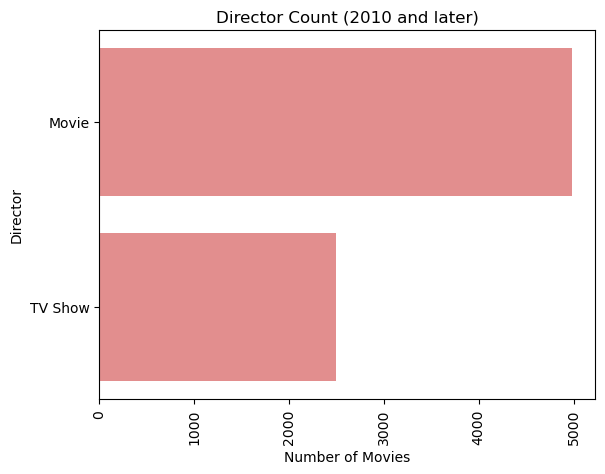

In [117]:
sns.countplot(data=df[df["release_year"] >= 2010], y="type", color="lightcoral")
plt.title("Director Count (2010 and later)")
plt.xticks(rotation=90)
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

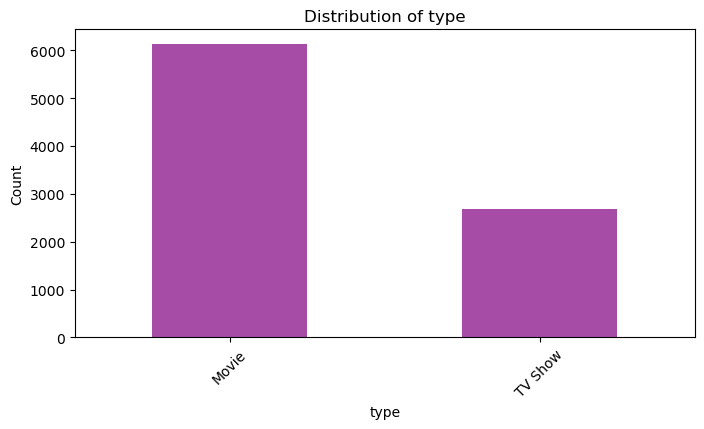

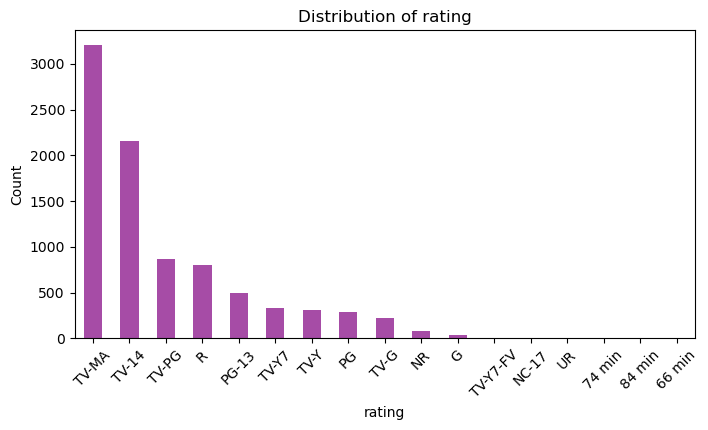

In [118]:
# Bar plot for categorical variables
categorical_columns = ['type', 'rating']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='purple', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

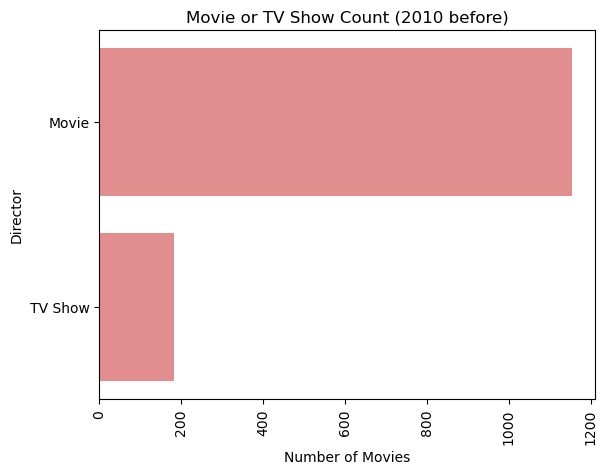

In [119]:
sns.countplot(data=df[df["release_year"] < 2010], y="type", color="lightcoral")
plt.title("Movie or TV Show Count (2010 before)")
plt.xticks(rotation=90)
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

In [120]:
# Movie or TV Show's Duration Distributions by Year 
def plot_scatter(Movie_or_Show, year):
    filtered_df = df[(df["release_year"] > year) & (df["type"] == Movie_or_Show)]
    fig = px.scatter(filtered_df, x="release_year", y="rating", 
                     title="Movie Duration Over Years",
                     labels={"release_year": "Year", "Rating": "Rating"},
                     color="release_year", size_max=10)
    fig.show()

In [121]:
plot_scatter("Movie", 2010)

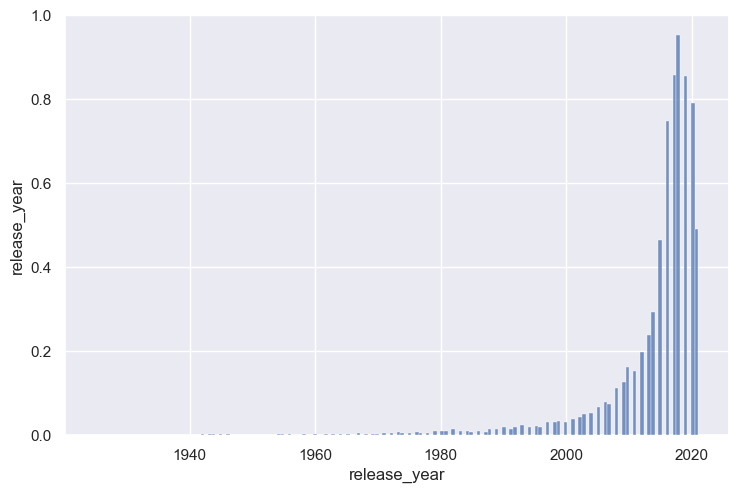

In [132]:

sns.pairplot(df[['release_year']], height=5, aspect=1.5)  # Adjust height and width
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
plt.show()

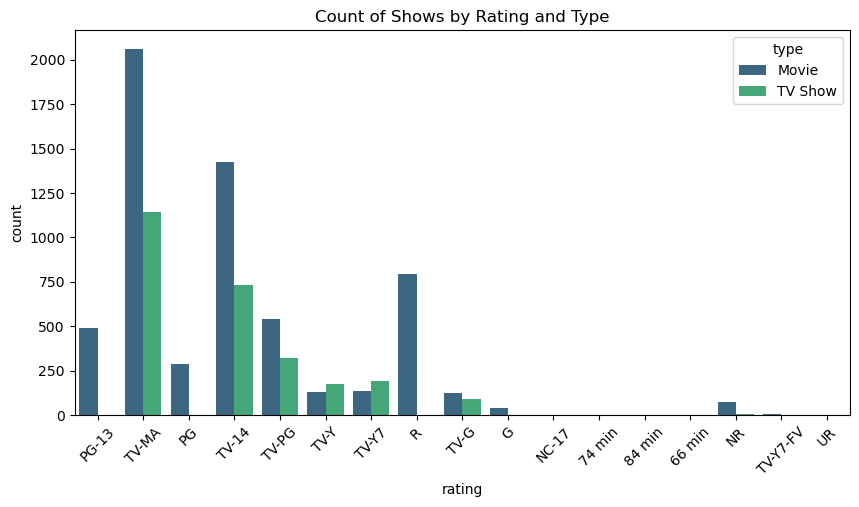

In [123]:
# Count plot for categorical comparison
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', hue='type', palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Shows by Rating and Type')
plt.show()

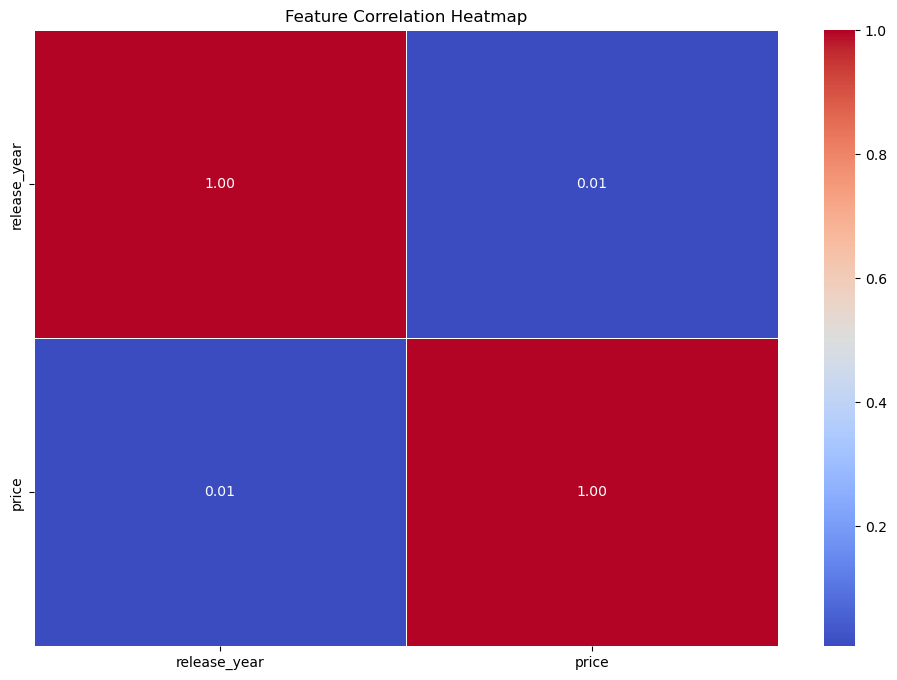

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's already loaded as df)
# df = pd.read_csv("your_file.csv")  # Uncomment if loading from CSV

# Add a synthetic numeric column to ensure at least two numeric features
df["price"] = np.random.randint(1, 100, size=len(df))  # Adds a column with random integers

# Convert categorical columns to numerical (one-hot encoding)
categorical_cols = df.select_dtypes(include=['object']).columns  # Select categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

